# MIE1624 Final Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objs as go
import warnings
import scipy
warnings.filterwarnings('ignore')
%matplotlib inline

## Question 1

In [3]:
df=pd.read_csv(r'C:\Users\Administrator\Desktop\xhh\Covid19-vaccination.csv')
print(df.shape)
df.head()

(63006, 16)


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [4]:
#Check missing values in each columns
df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     27277
people_vaccinated                      28883
people_fully_vaccinated                31853
total_boosters                         56393
daily_vaccinations_raw                 33083
daily_vaccinations                       326
total_vaccinations_per_hundred         27277
people_vaccinated_per_hundred          28883
people_fully_vaccinated_per_hundred    31853
total_boosters_per_hundred             56393
daily_vaccinations_per_million           326
daily_people_vaccinated                 1558
daily_people_vaccinated_per_hundred     1558
dtype: int64

First delete the null values of 'total_vaccinations', because the data below is calculated based on this column, so if one row of 'total_vaccinations' is null, the other features corresponding to it will be meaningless.

In [5]:
#Drop missing values in 'total_vaccinations'
df=df.dropna(subset=['total_vaccinations'])
df.shape

(35729, 16)

In [6]:
#Creat an auxiliary data frame
df1=df.dropna(subset=['people_vaccinated'])
df1.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,0.020


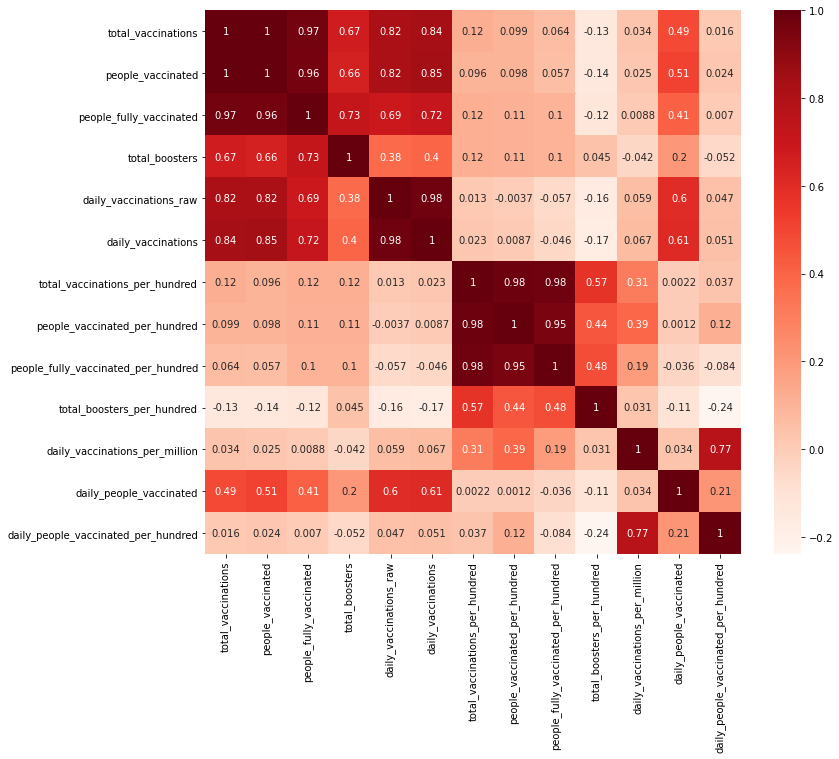

In [7]:
#Creat a heatmap to check the correlations between each features
plt.figure(figsize=(12, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

It is obviously that 'total_vaccination' and 'people_vaccinated', 'total_vaccinations_per_hundred' and 'people_vaccinated_per_hundred' these two groups of features are strongly correlated after dropping missing values.

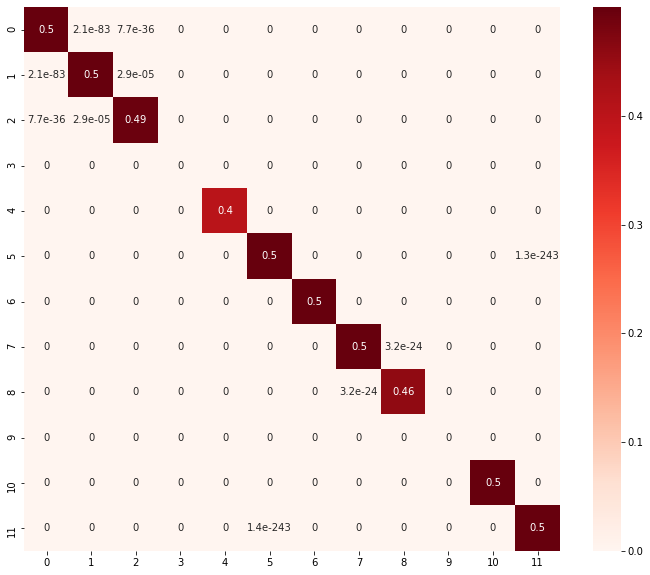

In [8]:
# Perform the Mann-Whitney U test and creat a heatmap to show the 
# similarities between features

from scipy.stats import mannwhitneyu
columns=df1.iloc[:, 3:15]
mnu=[]

for i in columns:
    mwu_test=[]
    for j in columns:
        mwu_test.append(mannwhitneyu(df1[i], df1[j]).pvalue)
    mnu.append(mwu_test)
 
plt.figure(figsize=(12, 10))
sns.heatmap(mnu, annot=True, cmap=plt.cm.Reds)
plt.show()

We can see that all p-values are less than 0.05 (except diagonal), which means that we can reject all null hypothesis, thus all features' distributions are not same.
According to these two heatmaps, we could find from total_booster to daily_people_vaccinated these 9 features have few correlation to total_vaccinations, therefore set these 9 columns missing values to 0.

In [9]:
#Set all missing values in last 9 columns to be zero
df['total_boosters'] = df['total_boosters'].fillna(0)
df['daily_vaccinations_raw'] = df['daily_vaccinations_raw'].fillna(0)
df['daily_vaccinations'] = df['daily_vaccinations'].fillna(0)
df['people_vaccinated_per_hundred'] = df['people_vaccinated_per_hundred'].fillna(0)
df['people_fully_vaccinated_per_hundred'] = df['people_fully_vaccinated_per_hundred'].fillna(0)
df['daily_vaccinations_per_million'] = df['daily_vaccinations_per_million'].fillna(0)
df['total_vaccinations_per_hundred']=df['total_vaccinations_per_hundred'].fillna(0)
df['total_boosters_per_hundred']=df['total_boosters_per_hundred'].fillna(0)
df['daily_people_vaccinated']=df['daily_people_vaccinated'].fillna(0)
df['daily_people_vaccinated_per_hundred']=df['daily_people_vaccinated_per_hundred'].fillna(0)
df.iloc[:, 6:15].isna().sum()

total_boosters                         0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
daily_vaccinations_per_million         0
daily_people_vaccinated                0
dtype: int64

Now using the mean value of each column to fill in the missing values of 'people_vaccinations' and 'people_fully_vaccinated'.

In [10]:
# For the column 'people_vaccinated' and 'people_fully_vaccinated', use 'mean' to 
# fill in the missing values

from sklearn.impute import SimpleImputer

#first fill in 'people_vaccinated'
df_fillin=SimpleImputer(missing_values=np.nan, strategy='mean',copy=False)
df_A=df.loc[:, 'people_vaccinated'].values.reshape(-1,1)
df.loc[:, 'people_vaccinated']=df_fillin.fit_transform(df_A)

#next fill in 'people_fully_vaccinated'
df_B=df.loc[:, 'people_fully_vaccinated'].values.reshape(-1,1)
df.loc[:, 'people_fully_vaccinated']=df_fillin.fit_transform(df_B)
df.isna().sum()

location                               0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
total_boosters                         0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
daily_vaccinations_per_million         0
daily_people_vaccinated                0
daily_people_vaccinated_per_hundred    0
dtype: int64

In [11]:
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,4.146463e+07,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,4.146463e+07,0.0,0.0,1367.0,0.02,0.02,0.0,0.0,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,4.146463e+07,0.0,0.0,2862.0,0.14,0.14,0.0,0.0,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,4.146463e+07,0.0,0.0,3000.0,0.30,0.30,0.0,0.0,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,4.146463e+07,0.0,0.0,8000.0,0.60,0.60,0.0,0.0,201.0,8000.0,0.020


Now there are no missing values in this data set.

## Question 2

Since there are only a few thousand people in some regions, too small a sample size can cause large variance and bias and increases the margin of error. therefore I only focus on countries in following analysis.

In [12]:
# Use 'total_vaccinations_per_hundred'to plot the graph of the vaccinations per 100 people

#First group the data by locations
countries=df.groupby(['location']).total_vaccinations_per_hundred

countries1=pd.DataFrame(countries, columns=['countries', 'vaccinations_rate'])
countries1

,countries,vaccinations_rate
0,Afghanistan,0 0.00 6 0.02 22 0.14 44 ...
1,Africa,266 0.00 270 0.00 272 0.00 273 ...
2,Albania,583 0.00 585 0.00 586 0.01 587 ...
3,Algeria,899 0.00 900 0.00 920 0.17 1102...
4,Andorra,1188 0.74 1195 1.34 1204 1.67 1...
...,...,...
230,Wallis and Futuna,61722 11.59 61729 28.75 61737 35.0...
231,World,61960 0.00 61961 0.00 61962 0.00 6...
232,Yemen,62316 0.06 62336 0.34 62345 0.64 6234...
233,Zambia,62509 0.00 62510 0.00 62513 0.01 6251...


In [13]:
#Find the top ten countries with the highest vaccination rate
top_countries1=countries.max().sort_values(ascending=False).reset_index()
top_countries1[0:25]

,location,total_vaccinations_per_hundred
0,Gibraltar,285.00
1,Cuba,246.08
2,United Arab Emirates,215.68
3,Chile,208.43
4,Pitcairn,200.00
5,Uruguay,192.82
6,Singapore,184.89
7,Malta,180.29
8,Cayman Islands,179.61
9,Jersey,177.58


In [14]:
#Select top 10 countries (ignore regions) 
top10=top_countries1.loc[[1, 2, 3, 5, 6, 7, 10, 12, 13]]
top10

,location,total_vaccinations_per_hundred
1,Cuba,246.08
2,United Arab Emirates,215.68
3,Chile,208.43
5,Uruguay,192.82
6,Singapore,184.89
7,Malta,180.29
10,Seychelles,177.32
12,Iceland,177.14
13,Israel,173.05


Text(0, 0.5, 'Average doses of total vaccinations per 100 people')

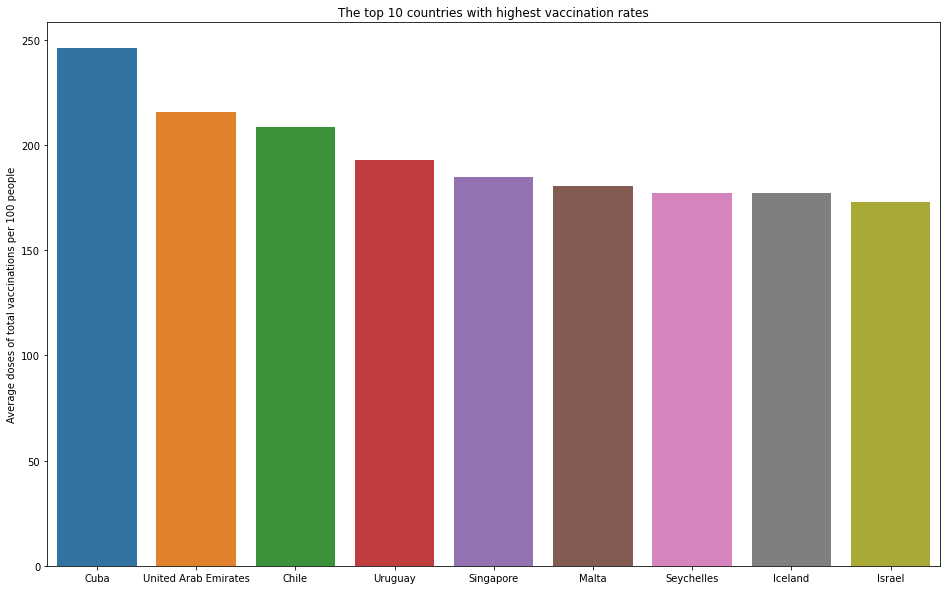

In [15]:
# Now create a graph to show the vaccination rate for 
# first ten countries(ignore regions)

plt.figure(figsize=(16, 10))
sns.barplot(x=top10['location'], y=top10['total_vaccinations_per_hundred'])
plt.title('The top 10 countries with highest vaccination rates')
plt.xlabel(' ')
plt.ylabel('Average doses of total vaccinations per 100 people')

As we can see, Cuba has the highest 'Average doses of total vaccinations per 100 people'. Surprisingly, developed countries such as the United States and The United Kingdom are not on board. The most populous countries, India and China, are also not on the list. In addition, Iceland is the only developed country (360,000 population), so the 'Average doses of total vaccinations per 100 people' not have much relation to the development level of a country. On the contrary, the number of population has a great influence on the average vaccine dose per 100 people, possibly because countries with a small population are better at promoting and organizing vaccination.

In [16]:
# Now plot a run chart to show the trend of total vaccinations for top 
# ten countries

# First find out the highest value of 'total vaccinations' of each country, 
# then sorting these value from highest to low and find out the top 10 countries

countries2=df.groupby(['location']).total_vaccinations
top_countries2=countries2.max().sort_values(ascending=False).reset_index()
top_countries2[0:25]

,location,total_vaccinations
0,World,7.713117e+09
1,Asia,5.229499e+09
2,Upper middle income,3.655719e+09
3,China,2.437252e+09
4,Lower middle income,2.238259e+09
5,High income,1.772234e+09
6,India,1.168057e+09
7,Europe,9.163825e+08
8,North America,7.292666e+08
9,European Union,6.186240e+08


In [25]:
top10_2=top_countries2.loc[[3, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
location=top10_2['location']

countries3=df[['location', 'date', 'total_vaccinations']]
countries3=countries3.sort_values(by='total_vaccinations', ascending=False)
countries3

,location,date,total_vaccinations
62315,World,2021-11-21,7.713117e+09
62314,World,2021-11-20,7.693441e+09
62313,World,2021-11-19,7.665879e+09
62312,World,2021-11-18,7.640465e+09
62311,World,2021-11-17,7.611179e+09
...,...,...,...
32364,Liechtenstein,2021-01-01,0.000000e+00
32363,Liechtenstein,2020-12-31,0.000000e+00
32362,Liechtenstein,2020-12-30,0.000000e+00
32361,Liechtenstein,2020-12-29,0.000000e+00


In [26]:
top10_2=countries3[countries3.location.isin(location)]
top10_2

,location,date,total_vaccinations
11709,China,2021-11-21,2.437252e+09
11708,China,2021-11-20,2.430743e+09
11707,China,2021-11-19,2.422908e+09
11706,China,2021-11-18,2.416179e+09
11705,China,2021-11-17,2.409784e+09
...,...,...,...
266,Africa,2021-01-09,0.000000e+00
8056,Brazil,2021-01-16,0.000000e+00
43351,Pakistan,2021-02-02,0.000000e+00
57400,Turkey,2021-01-13,0.000000e+00


In [27]:
import plotly.express as px

fig=px.line(top10_2, x='date', y='total_vaccinations', color='location')
fig.update_layout(
    title="Total vaccination trend",
    xaxis_title="Date",
    yaxis_title="Total Vaccinations"
)
fig.show()

It can be seen that the total vaccination amount in China increased sharply after May, With the high populations, USA is the second vaccination country. The trend of the remaining several countries is very similar and all of them are slowly increasing. However, total vaccination is based on population, so these countries are among the world's top populations. So next we need to look at trends in the number of vaccinations per million people per day.

In [20]:
# Now plot a run chart to show the trend of daily vaccinations per million 
# people for top ten countries

# First find out the highest value of 'people fully vaccinations' of each country, 
# then sorting these numbers from highest to low and find out the top 10 countries


countries4=df.groupby(['location']).people_fully_vaccinated
top_countries4=countries4.max().sort_values(ascending=False).reset_index()
top_countries4[0:25]

,location,people_fully_vaccinated
0,World,3.287201e+09
1,Asia,2.176438e+09
2,Upper middle income,1.615388e+09
3,China,1.076308e+09
4,Lower middle income,8.398658e+08
5,High income,8.135848e+08
6,Europe,4.276655e+08
7,India,4.010692e+08
8,North America,3.224723e+08
9,European Union,2.981220e+08


In [21]:
top10_3=top_countries4.loc[[3, 7, 11, 12, 13, 15, 16, 17, 18, 19]]
location2=top10_3['location']

countries5=df[['location', 'date', 'people_fully_vaccinated']]
countries5=countries5.sort_values(by='people_fully_vaccinated', ascending=True)
countries5

,location,date,people_fully_vaccinated
3093,Asia,2020-12-19,1.000000e+00
27688,Israel,2021-01-03,1.000000e+00
27687,Israel,2021-01-02,1.000000e+00
27686,Israel,2021-01-01,1.000000e+00
27685,Israel,2020-12-31,1.000000e+00
...,...,...,...
62311,World,2021-11-17,3.240474e+09
62312,World,2021-11-18,3.255704e+09
62313,World,2021-11-19,3.268048e+09
62314,World,2021-11-20,3.279849e+09


In [22]:
top10_4=countries5[countries5.location.isin(location2)]
top10_4

,location,date,people_fully_vaccinated
21128,Germany,2020-12-27,1.100000e+01
28620,Japan,2021-03-10,3.500000e+01
21129,Germany,2020-12-28,7.500000e+01
28621,Japan,2021-03-11,4.430000e+02
21130,Germany,2020-12-29,7.270000e+02
...,...,...,...
11680,China,2021-10-23,1.067621e+09
11686,China,2021-10-29,1.070386e+09
11693,China,2021-11-05,1.072454e+09
11700,China,2021-11-12,1.073845e+09


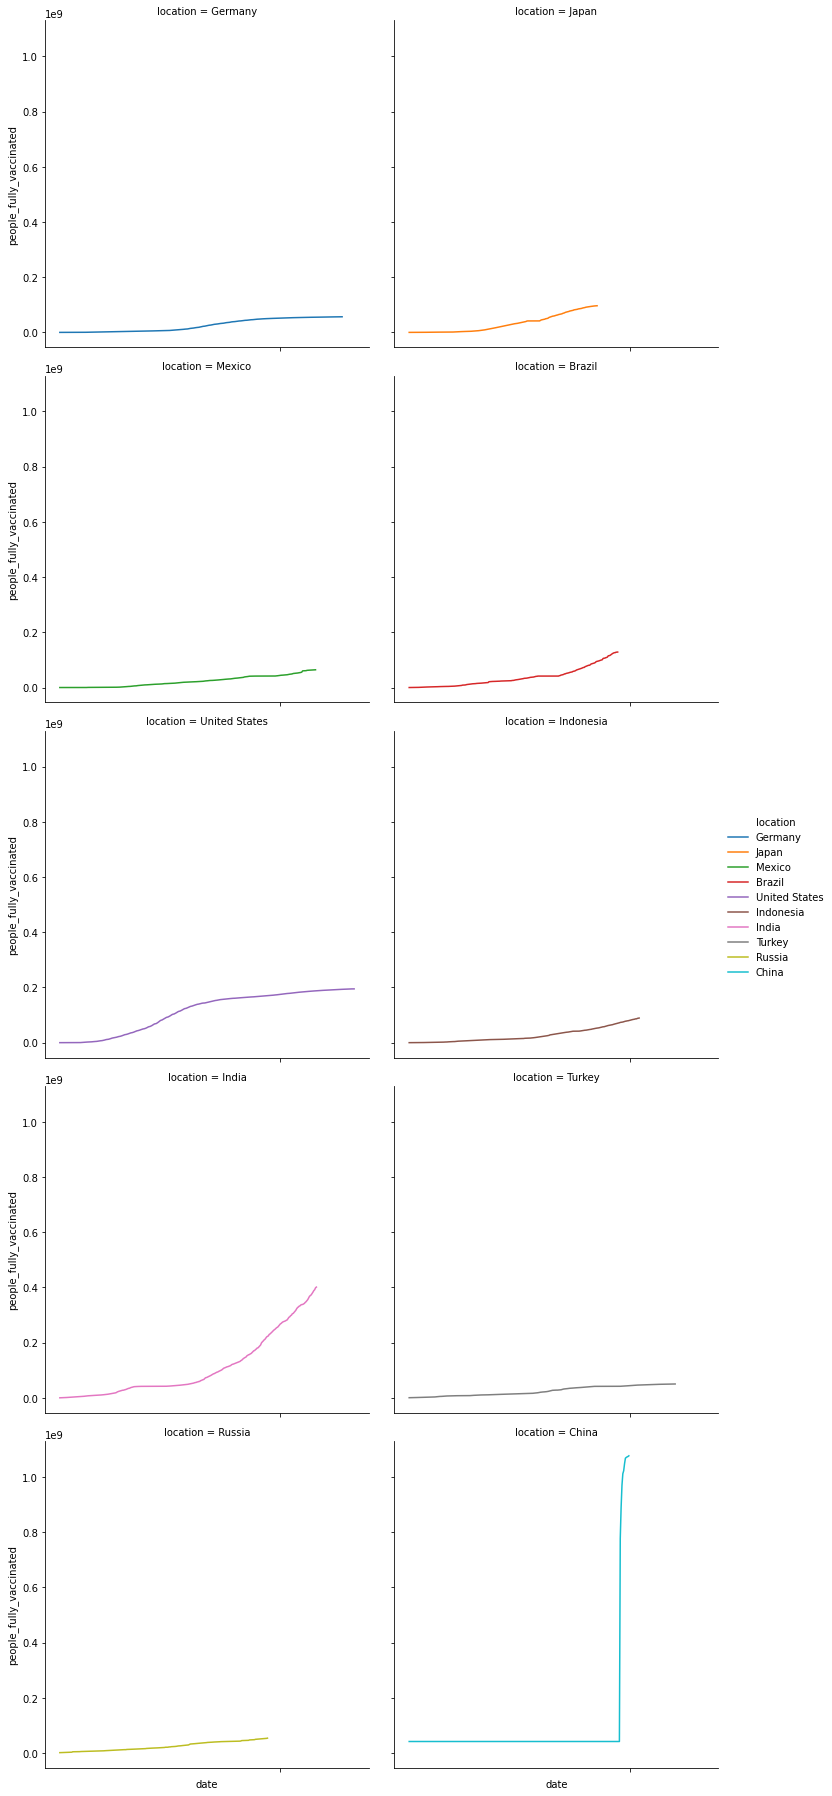

In [23]:
sns.relplot(data=top10_4, x='date', y='people_fully_vaccinated', hue='location', col='location', kind='line', col_wrap=2)
plt.xticks('');

The higest point of each graph express the current number of fully vaccinated people of each countries. China has the highest  number of fully vaccinated people in the world, which is not surprisly, since they have almost 20% populations in the world, China's highly incentive policy about vaccine is a important factor lead China be the highest people fully vaccinated country, but the trend is not similar in India, though they have almost same populations, India's fully vaccinated people is only 1/3 of China, the resons could be vary, poor anti-epodemic measures, people refuse taking vaccine, poor vaccine producing ability,  trend increaing faster after May, it is due to the higher vaccine producing rate. Other countries have similar increasing trend, based on populations, different countries reached different highest point.

In [24]:
#Now focus on 'daily_vaccinations_per_million'

# First we need to find the average daily doses per million for each country, 
# and sort by descending order

countries6=df.groupby(['location']).daily_vaccinations_per_million.mean().sort_values(ascending=False)
countries6=countries6.reset_index()
countries6[0:25]

,location,daily_vaccinations_per_million
0,Niue,31443.500000
1,Falkland Islands,20030.166667
2,Bhutan,17187.265957
3,Cuba,13338.852071
4,Saint Helena,12797.333333
5,Gibraltar,12622.031746
6,Cook Islands,12152.545455
7,Nauru,11571.636364
8,Seychelles,10045.986301
9,Pitcairn,8510.800000


In [25]:
top10_5=countries6.loc[[2, 3, 7, 8, 12, 13, 14, 15, 16, 17]]
location3=top10_5['location']
top10_5=countries6[countries6.location.isin(location3)]
top10_5

,location,daily_vaccinations_per_million
2,Bhutan,17187.265957
3,Cuba,13338.852071
7,Nauru,11571.636364
8,Seychelles,10045.986301
12,Uruguay,7209.067164
13,Greenland,6898.566038
14,United Arab Emirates,6674.589474
15,Brunei,6532.678322
16,China,6342.809339
17,Singapore,6335.250000


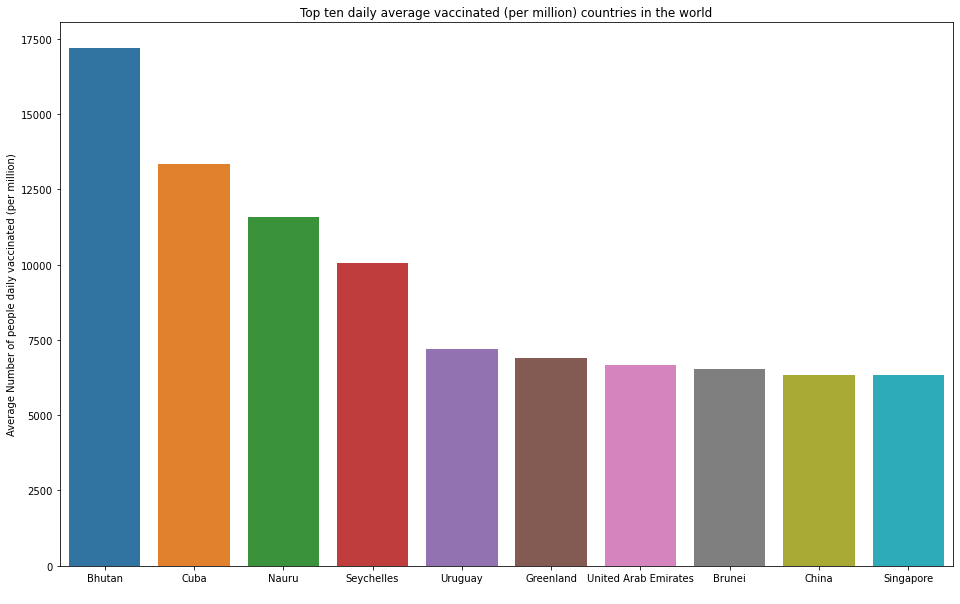

In [26]:
plt.figure(figsize=(16, 10))
plt.title('Top ten daily average vaccinated (per million) countries in the world')
sns.barplot(x=top10_5['location'], y=top10_5['daily_vaccinations_per_million'])
plt.xlabel(' ')
plt.ylabel('Average Number of people daily vaccinated (per million)');

Niue has the highest value of daily average vaccinated (per million) countries in the world, but they only have 1620 people in the world, so ignore that country's data.

## Question 3

In [23]:
# Create a new data frame for vaccination rate of Canada and 
# sort the date by ascending order
cdf=df.loc[df['location']=='Canada']
cdf=cdf.sort_values('date')
cdf.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
9795,Canada,CAN,2020-12-14,5.0,5.0,4.146463e+07,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000
9796,Canada,CAN,2020-12-15,727.0,727.0,4.146463e+07,0.0,722.0,722.0,0.00,0.00,0.0,0.0,19.0,722.0,0.002
9797,Canada,CAN,2020-12-16,3016.0,3016.0,4.146463e+07,0.0,2289.0,1506.0,0.01,0.01,0.0,0.0,40.0,1506.0,0.004
9798,Canada,CAN,2020-12-17,7267.0,7267.0,4.146463e+07,0.0,4251.0,2421.0,0.02,0.02,0.0,0.0,64.0,2421.0,0.006
9799,Canada,CAN,2020-12-18,11276.0,11276.0,4.146463e+07,0.0,4009.0,2818.0,0.03,0.03,0.0,0.0,74.0,2818.0,0.007


In [24]:
cval=cdf['people_vaccinated_per_hundred'].values
cval=pd.Series(cval)

Choose ARIMA model to do the forecasting, first find the valus of 'd'.

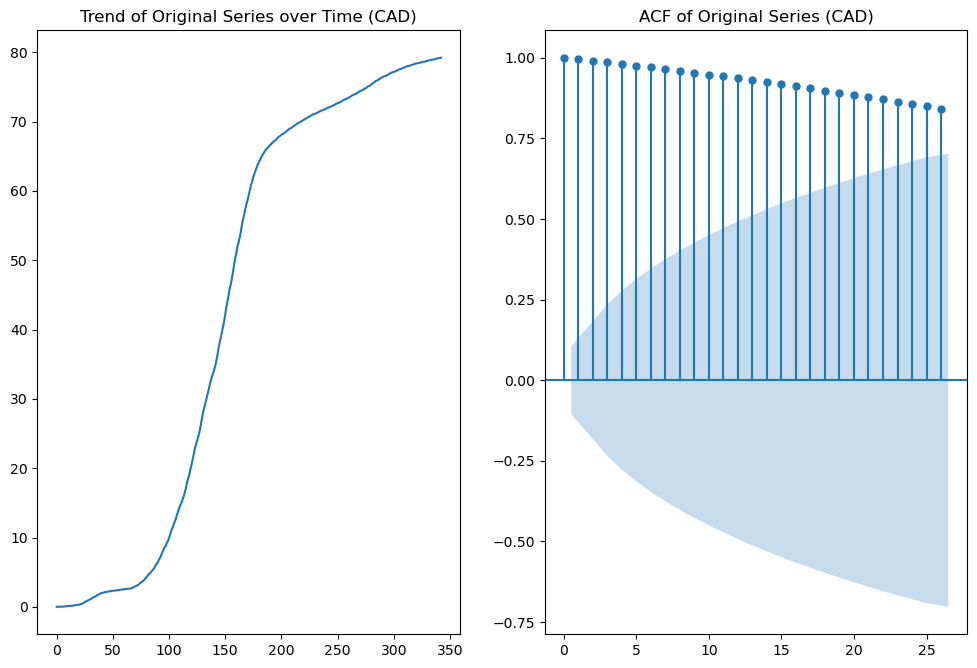

In [25]:
# Check if the original serires is stationary by plotting the trend and
# ACF of the original series
from statsmodels.graphics.tsaplots import plot_acf
fig0, axes = plt.subplots(1,2,figsize=(12, 10), dpi= 100)

cval.plot(figsize=(12,8), ax=axes[0], title='Trend of Original Series over Time (CAD)')
plot_acf(cval, ax=axes[1], title='ACF of Original Series (CAD)');

We can see that the series is not stationary, since both plots have obvious trends, thus need to do differencing to make the series stationary.

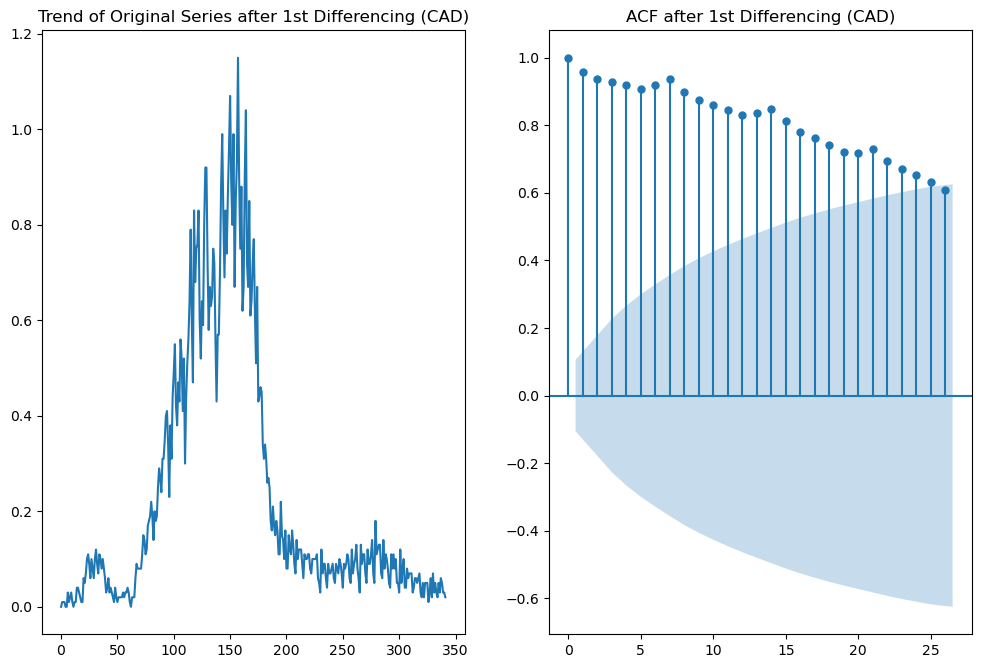

In [26]:
#First order differencing

fig1, axes = plt.subplots(1,2,figsize=(12, 10), dpi= 100)

diff1=pd.Series(np.diff(cval))
diff1.plot(figsize=(12,8), ax=axes[0], title='Trend of Original Series after 1st Differencing (CAD)')
plot_acf(diff1, ax=axes[1], title='ACF after 1st Differencing (CAD)');

The plots show that the first differencing series is still not stationary since there is trend in ACF.

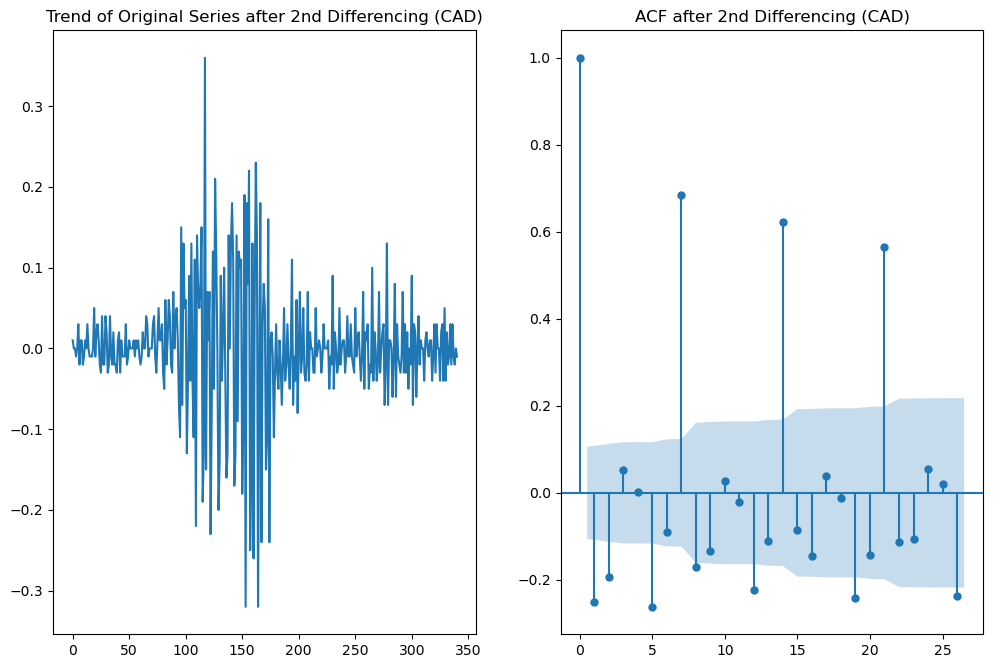

In [27]:
#Second order differencing

fig2, axes = plt.subplots(1,2,figsize=(12, 10), dpi= 100)

diff2=pd.Series(np.diff(diff1))
diff2.plot(figsize=(12,8), ax=axes[0], title='Trend of Original Series after 2nd Differencing (CAD)')
plot_acf(diff2, ax=axes[1], title='ACF after 2nd Differencing (CAD)');

It seems that the series has weak stationarity after second differencing, now perform ADF test to check.

In [28]:
#Try to find the best 'd'
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

can_stepwise_fit = pm.auto_arima(cval, trace=True, suppress_warning=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-829.925, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-776.375, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-796.401, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-819.566, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-831.934, Time=0.15 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-833.339, Time=0.09 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-831.975, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-829.548, Time=0.09 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-836.736, Time=0.31 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-870.604, Time=0.45 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-891.532, Time=0.52 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-835.043, Time=0.39 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=-898.845, Time=0.48 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=-838.398, Time=0.46 sec
 ARIMA(5,2,3)(0,0,0)[0]          

It seems that the best value of 'd' is 2.

In [29]:
#Use ADF test to check is d=2 is acceptable
from statsmodels.tsa.stattools import adfuller

cresult=adfuller(diff2)
print('The ADF Statistic of 2nd order differencing: %f' % cresult[0])  
print('The p value of 2nd order differencing: %f' % cresult[1])

The ADF Statistic of 2nd order differencing: -2.917914
The p value of 2nd order differencing: 0.043304


The p-value is 0.0433 which is less than 0.05, thus the null hypothesis is rejected which means the sereies is stationary after second order differencing, thus the valus of 'd' for the first series is 2.

In [30]:
# Build and find the best ARIMA model with minimum AIC to find the values of 'p'
# and 'q', also use ADF test to find the value of 'd'.

cmodel1 = pm.auto_arima(cval, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=5, max_q=5, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=None,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(cmodel1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-104.728, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3713.639, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-805.313, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-818.800, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-338.133, Time=0.31 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-819.776, Time=0.31 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-817.309, Time=0.23 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-796.403, Time=0.47 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-817.892, Time=0.33 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-794.515, Time=0

The 'auto_arima' returns the best model with the least AIC: ARIMA(5, 0, 2), however, the value od 'd' should not be 0 since the original series is not stationary. Next use 'auto_arima' and set d=2 to find the best model.

In [31]:
# Build and find the best ARIMA model with minimum AIC to find the values of 'p'
# and 'q', set 'd'=2.

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
cmodel2 = pm.auto_arima(cval, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=5, max_q=5, # maximum p and q
m=1, # frequency of series
d=2, # set d=2 according to previous ADF test
seasonal=False, # No Seasonality
start_P=0,
D=None,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(cmodel2.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-827.550, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-774.375, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-794.401, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-817.567, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-776.375, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-829.741, Time=0.26 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-818.651, Time=0.12 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-827.765, Time=0.51 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-827.927, Time=0.40 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-833.128, Time=0.52 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-831.341, Time=0.25 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-834.738, Time=0.57 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-829.977, Time=0.28 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-849.477, Time=0.66 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept

In [32]:
#Now split the data into train and test set to find the optimal model between ARIMA(5,0,2) and ARIMA(2,2,5)

split_point = int(len(cval) * 0.7)
can_train, can_test = cval[0:split_point], cval[split_point:len(cval)]

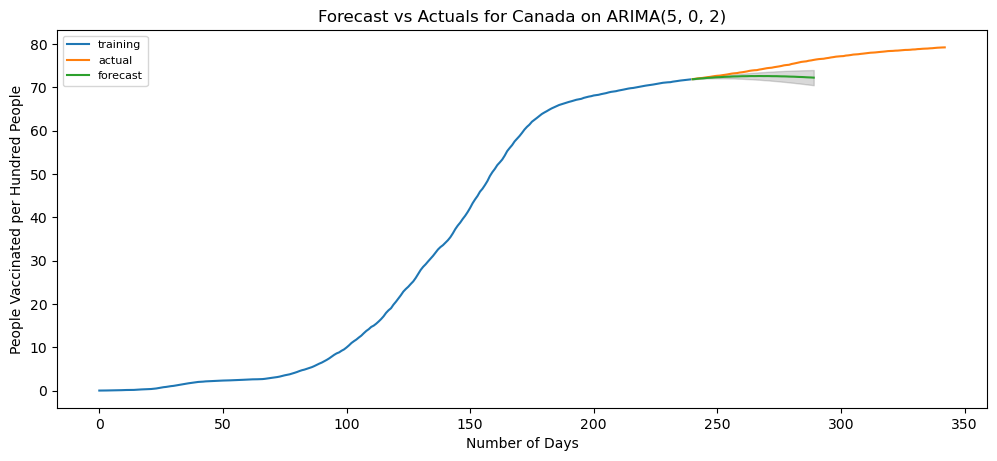

In [33]:
# Forecast
n_periods=50
can_model_opt1 = ARIMA(can_train, order=(5, 0, 2))
can_model_fit1 = can_model_opt1.fit(disp=-1)
can_fc1, can_se1, can_confint1 = can_model_fit1.forecast(50, alpha=0.85)
can_index_of_fc1 = np.arange(len(can_train), len(can_train)+n_periods)

# make series for plotting purpose
can_fc_series1 = pd.Series(can_fc1, index=can_index_of_fc1)
can_lower_series1 = pd.Series(can_confint1[:, 0], index=can_index_of_fc1)
can_upper_series1 = pd.Series(can_confint1[:, 1], index=can_index_of_fc1)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(can_train, label='training')
plt.plot(can_test, label='actual')
plt.plot(can_fc_series1, label='forecast')
plt.ylabel('People Vaccinated per Hundred People')
plt.xlabel('Number of Days')
plt.fill_between(can_lower_series1.index, can_lower_series1, can_upper_series1, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals for Canada on ARIMA(5, 0, 2)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

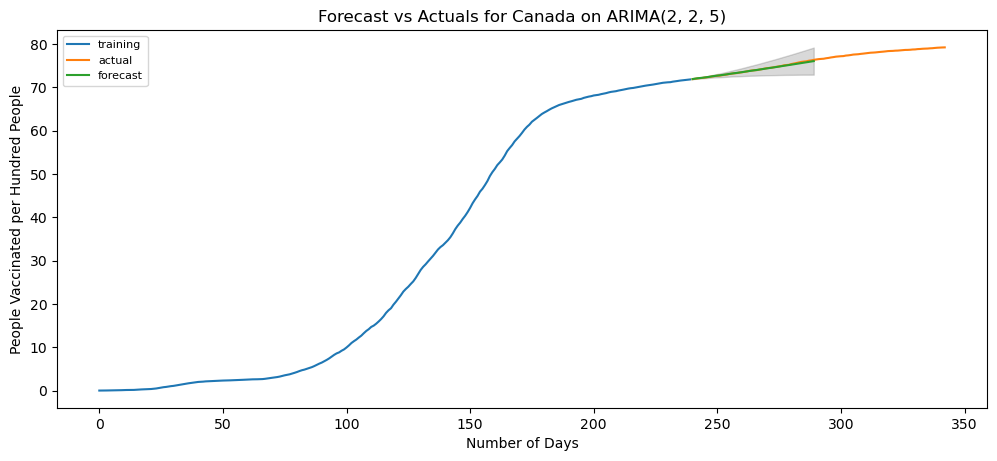

In [34]:
# Forecast
can_model_opt2 = ARIMA(can_train, order=(5, 2, 2))
can_model_fit2 = can_model_opt2.fit(disp=-1)
can_fc2, can_se2, can_confint2 = can_model_fit2.forecast(50, alpha=0.6)
can_index_of_fc2 = np.arange(len(can_train), len(can_train)+n_periods)

# make series for plotting purpose
can_fc_series2 = pd.Series(can_fc2, index=can_index_of_fc2)
can_lower_series2 = pd.Series(can_confint2[:, 0], index=can_index_of_fc2)
can_upper_series2 = pd.Series(can_confint2[:, 1], index=can_index_of_fc2)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(can_train, label='training')
plt.plot(can_test, label='actual')
plt.plot(can_fc_series2, label='forecast')
plt.ylabel('People Vaccinated per Hundred People')
plt.xlabel('Number of Days')
plt.fill_between(can_lower_series2.index, can_lower_series2, can_upper_series2, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals for Canada on ARIMA(2, 2, 5)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

According to compare these two trained model, we can see ARIMA(2, 2, 5) is more accurate, since 'forecast' is more correlate to 'actual', also the vaccination rate can only go up over time, therefore ARIMA(2, 2, 5) is more accurate. 

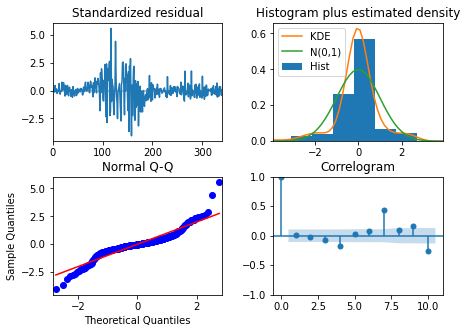

In [35]:
# Plot residual errors for ARIMA(2, 2, 5)

cmodel2.plot_diagnostics(figsize=(7,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Since all the p-value in the second 'auto_arima' test is less than 0.05, the ARIMA(2, 2, 5) is fine. The standardized residual plot shows that the mean is near zero and the density is close to normal distribution; also almost all points are around the line in the Normal Q-Q plot; finally, the ACF plot shows the RE are not autocorrelated. Therefore, the model ARIMA(2, 2, 5) is a good fit now.

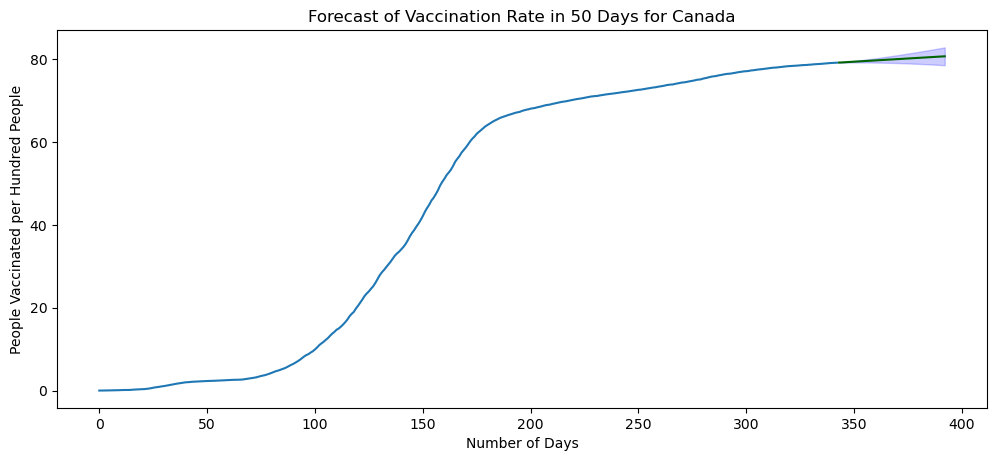

In [36]:
# Make final forecasting on model ARIMA(5, 2, 2)

n_periods = 50
fc, confint = cmodel2.predict(n_periods=n_periods, return_conf_int=True, alpha=0.75)
index_of_fc = np.arange(len(cval), len(cval)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(cval)
plt.plot(fc_series, color='darkgreen')
plt.ylabel('People Vaccinated per Hundred People')
plt.xlabel('Number of Days')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.2)
plt.title("Forecast of Vaccination Rate in 50 Days for Canada")
plt.show()

When I using 95% confidence interval to perform the three scenariaos, I found that the worst case is below the vaccination rate to date whcih is impossible, thus I tried to increase the value of $\alpha$ several times to make the forecasting more logical. The worst case is above the actual vaccination rate until I set the value to 0.75. The worst case for Canada's vaccination rates in 50 days is remain same as now, which is 79%(29.45 millions people). The best case is around 83%（30.94 millions people) and the base case is around 80%（29.82 million people）. 

### Now make prediction for USA by using same pipeline.

In [38]:
# Create a new data frame for vaccination rate of USA and 
# sort the date by ascending order
adf=df.loc[df['location']=='United States']
adf=adf.sort_values('date')
adf.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
59528,United States,USA,2020-12-13,21800.0,18529.0,3875.0,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.000
59529,United States,USA,2020-12-14,26124.0,22716.0,3971.0,0.0,4324.0,4324.0,0.01,0.01,0.0,0.0,13.0,4187.0,0.001
59530,United States,USA,2020-12-15,74833.0,69226.0,4166.0,0.0,48709.0,26516.0,0.02,0.02,0.0,0.0,79.0,25348.0,0.008
59531,United States,USA,2020-12-16,233645.0,222604.0,4548.0,0.0,158812.0,70615.0,0.07,0.07,0.0,0.0,210.0,68025.0,0.020
59532,United States,USA,2020-12-17,504183.0,486107.0,5110.0,0.0,270538.0,120596.0,0.15,0.14,0.0,0.0,359.0,116894.0,0.035


In [39]:
aval=adf['people_vaccinated_per_hundred'].values
aval=pd.Series(aval)

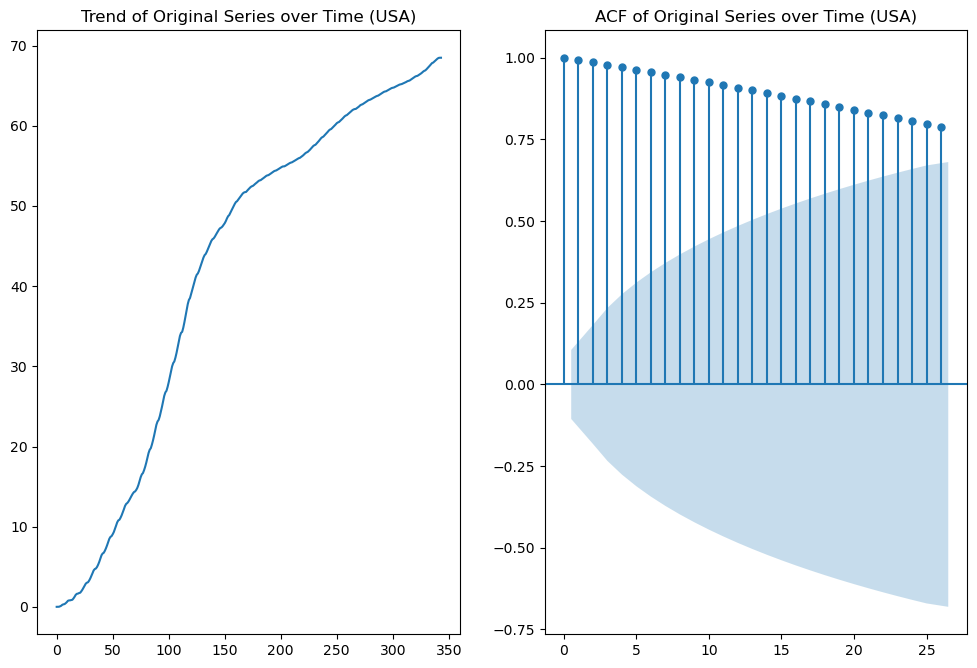

In [40]:
# First check if the original serires is stationary by plotting the trend and
# ACF graphs
fig3, axes = plt.subplots(1,2,figsize=(12, 10), dpi= 100)

aval.plot(figsize=(12,8), ax=axes[0], title='Trend of Original Series over Time (USA)')
plot_acf(aval, ax=axes[1], title='ACF of Original Series over Time (USA)');

It is obviously that the series is not stationary, do first order differencing.

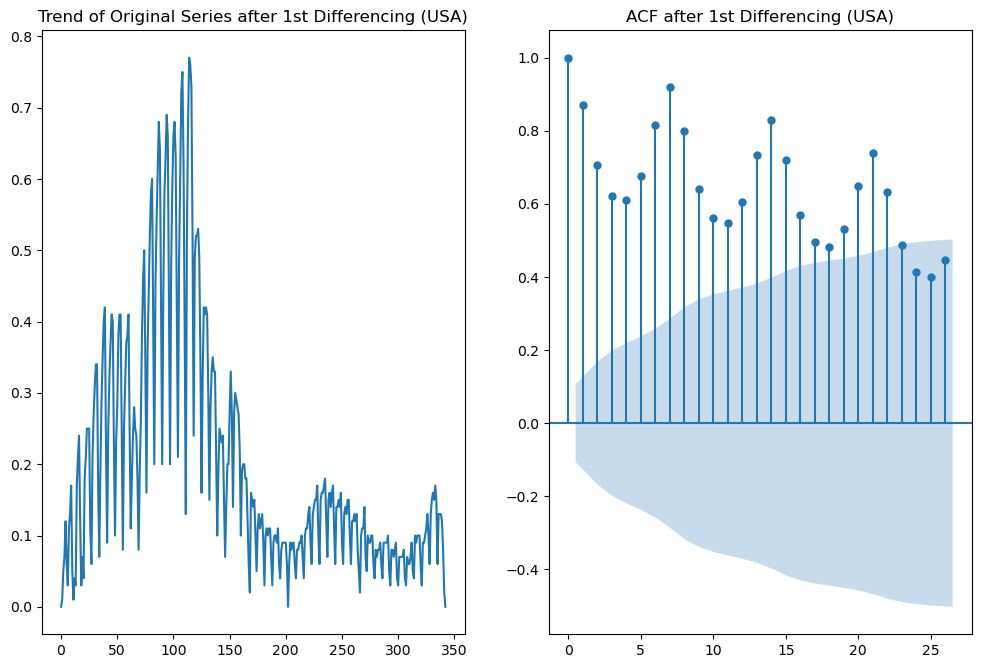

In [41]:
#First order differencing

fig4, axes = plt.subplots(1,2,figsize=(12, 10), dpi= 100)

diffa1=pd.Series(np.diff(aval))
diffa1.plot(figsize=(12,8), ax=axes[0], title='Trend of Original Series after 1st Differencing (USA)')
plot_acf(diffa1, ax=axes[1], title='ACF after 1st Differencing (USA)');

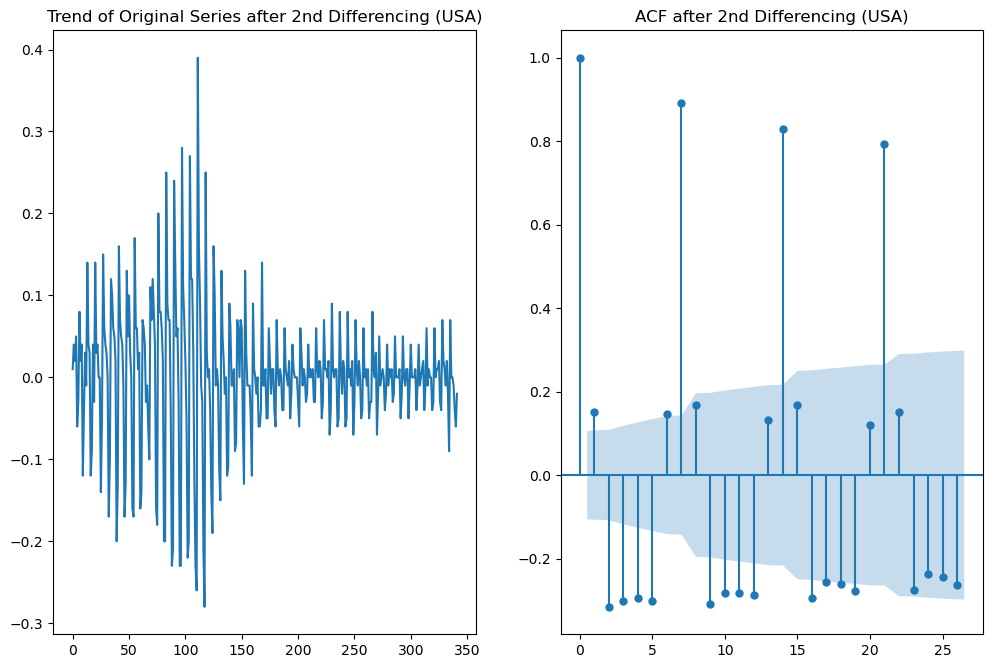

In [42]:
#Second order differencing

fig5, axes = plt.subplots(1,2,figsize=(12, 10), dpi= 100)

diffa2=pd.Series(np.diff(diffa1))
diffa2.plot(figsize=(12,8), ax=axes[0], title='Trend of Original Series after 2nd Differencing (USA)')
plot_acf(diffa2, ax=axes[1], title='ACF after 2nd Differencing (USA)');

In [43]:
#Perform ADF test to check the stationary

aresult=adfuller(diffa2)
print('The ADF Statistic of 2nd order difficing: %f' % aresult[0])  
print('The p value of 2nd order difficing: %f' % aresult[1])

The ADF Statistic of 2nd order difficing: -6.217483
The p value of 2nd order difficing: 0.000000


The p-value is 0 which is much less than 0.05, thus we can reject the null hypothesis which means that the series is stationary enough after second differencing.

In [44]:
#Build and find the best ARIMA model with minimum AIC to find the values of 'p'
# and 'q', also use ADF test to find the value of 'd'.

amodel = pm.auto_arima(aval, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=5, max_q=5, # maximum p and q
m=1, # frequency of series
d=None, # use adftest to find optimal 'd'
seasonal=False, # No Seasonality
start_P=0,
D=None,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(amodel.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-748.796, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-711.986, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-717.905, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-727.220, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-713.986, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-846.815, Time=0.41 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-759.470, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-855.893, Time=0.60 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-773.471, Time=0.31 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-909.229, Time=0.72 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-827.563, Time=0.43 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-993.494, Time=0.57 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-969.840, Time=0.43 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=-1109.096, Time=0.84 sec
 ARIMA(4,2,2)(0,0,0)[0] intercep

Since we got the same value of 'd' in both tests, we can select ARIMA(5, 2, 2) as our optimal model.

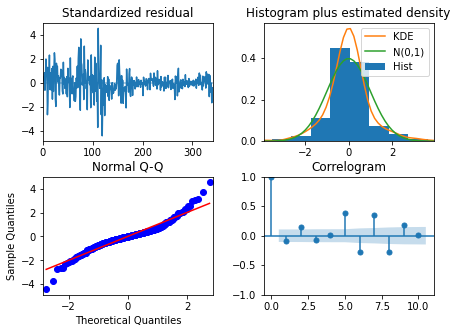

In [45]:
# Make plots to check the model ARIMA(5, 2, 2)

amodel.plot_diagnostics(figsize=(7,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

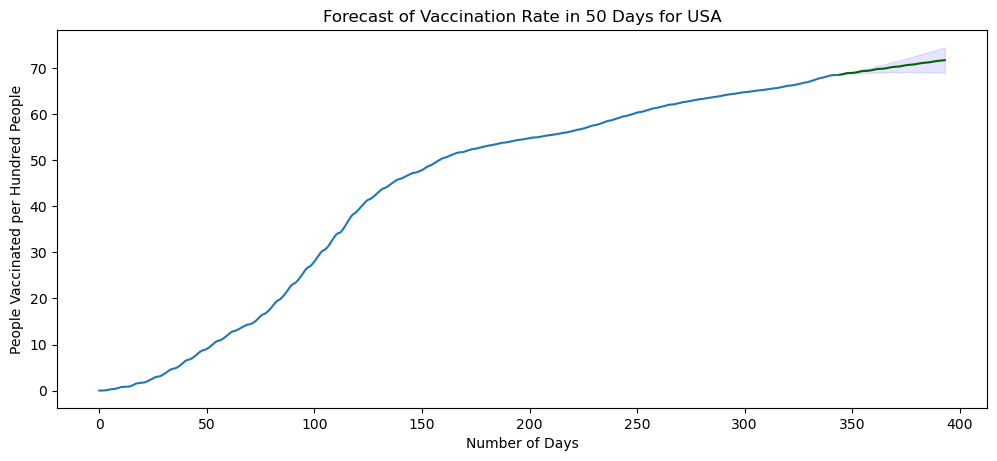

In [50]:
# Forecast
#n_periods=50
fc1, confint1 = amodel.predict(n_periods=n_periods, return_conf_int=True, alpha=0.5)
index_of_fc1 = np.arange(len(aval), len(aval)+n_periods)

# make series for plotting purpose
fc_series1 = pd.Series(fc1, index=index_of_fc1)
lower_series1 = pd.Series(confint1[:, 0], index=index_of_fc1)
upper_series1 = pd.Series(confint1[:, 1], index=index_of_fc1)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(aval)
plt.plot(fc_series1, color='darkgreen')
plt.ylabel('People Vaccinated per Hundred People')
plt.xlabel('Number of Days')
plt.fill_between(lower_series1.index,
lower_series1,
upper_series1,
color='b', alpha=.1)
plt.title("Forecast of Vaccination Rate in 50 Days for USA")
plt.show()

Similar to the Canada's case, the forcasting interval makes sense until the alpha value decrease to 0.5. The worst case for USA's vaccination rates in 50 days is remain same as now, which is 68% (0.224 billions people). The best case is around 72%（0.2372 billions people) and the base case is around 70%（0.23065 billion people）.

## Question 4

Choose the dataset 'Complete_covid19_dataset' to analyse The impact of vaccines on other outbreaks in Canada and the United States.

In [53]:
df2=pd.read_csv(r'C:\Users\Administrator\Downloads\Complete_covid19_dataset.csv')
df2.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Chosing 'new_cases' to analyze, new cases relate to the daily vaccinated people, since with the increase of the new cases, people may panic and take vaccine, also from the new case could be seen that does the vaccine working.

In [54]:
#Fisrt clean 'new_cases' in the second dataset for Canada.

can_cases=df2.loc[df2['location']=='Canada']
can_cases=can_cases.sort_values('date')
can_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
21310,CAN,North America,Canada,2020-01-26,1.0,1.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,-580.3,-2.28,-1.97,-15.243809
21311,CAN,North America,Canada,2020-01-27,1.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21312,CAN,North America,Canada,2020-01-28,2.0,1.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21313,CAN,North America,Canada,2020-01-29,2.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21314,CAN,North America,Canada,2020-01-30,2.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN


In [55]:
start_day='2020-12-14'
end_day='2021_11_19'
con1=can_cases['date']>=start_day
con2=can_cases['date']<end_day
can_cases=can_cases[con1&con2]

In [56]:
#Check missing values

can_cases['new_cases'].isna().sum()

0

There is no missing values in 'new_cases' thus can_cases is ready is ready to be analysed.

In [57]:
can_case=can_cases['new_cases'].values
can_case=pd.Series(can_case)
can_case.head()

0    8645.0
1    6291.0
2    6733.0
3    7467.0
4    7045.0
dtype: float64

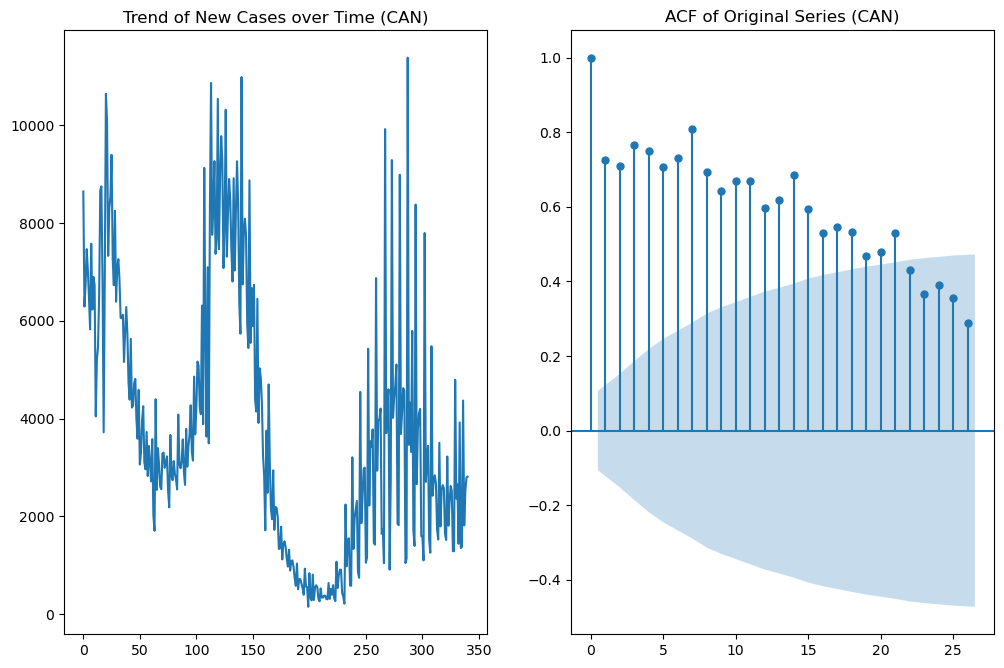

In [58]:
# Check if the original serires is stationary by plotting the trend and
# ACF of the original series

fig6, axes = plt.subplots(1,2,figsize=(12, 10), dpi= 100)

can_case.plot(figsize=(12,8), ax=axes[0], title='Trend of New Cases over Time (CAN)')
plot_acf(can_case, ax=axes[1], title='ACF of Original Series (CAN)');

By looking the ACF plot, the series need to do differencing

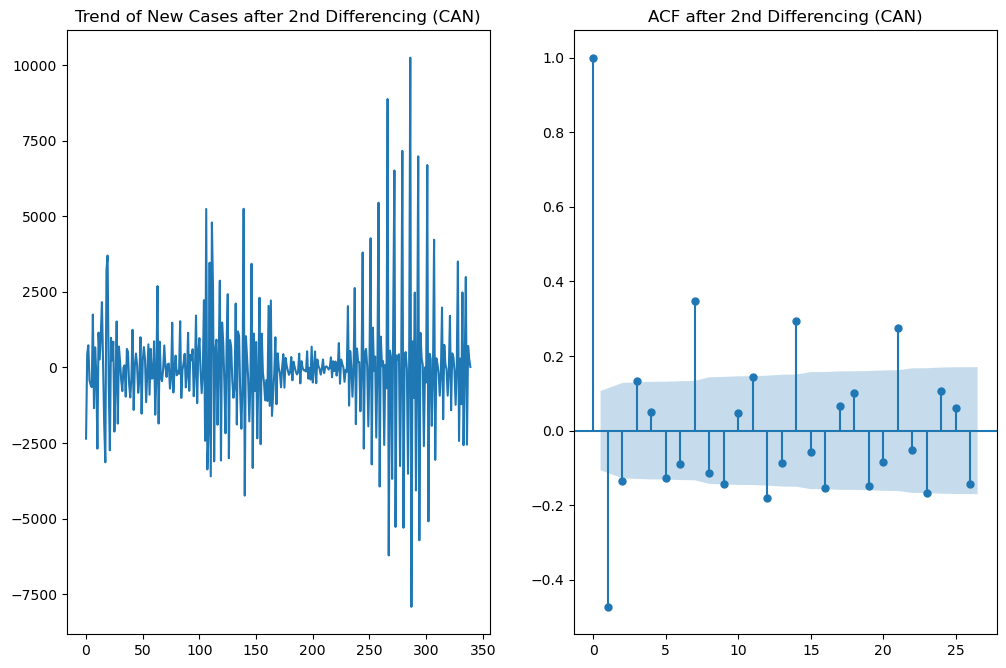

In [59]:
#First order differencing

fig7, axes = plt.subplots(1,2,figsize=(12, 10), dpi= 100)

diffca=pd.Series(np.diff(can_case))
diffca.plot(figsize=(12,8), ax=axes[0], title='Trend of New Cases after 2nd Differencing (CAN)')
plot_acf(diffca, ax=axes[1], title='ACF after 2nd Differencing (CAN)');

It seems that the series has weak stationarity after second differencing, now perform ADF test to check.

In [60]:
#Try to find the best 'd'
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

can_stepwise_fit2 = pm.auto_arima(can_case, trace=True, suppress_warning=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5883.984, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6129.734, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6044.314, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5936.718, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6127.762, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5917.865, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5898.912, Time=0.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5895.922, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5933.741, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5883.855, Time=0.47 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5886.281, Time=0.40 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=5887.104, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5928.946, Time=0.18 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : 

It seems that the best value of 'd' is 1.

In [61]:
#Use ADF test to check is d=1 is acceptable

can_result1=adfuller(diffca)
print('The ADF Statistic of 1st order differencing: %f' % can_result1[0])  
print('The p value of 1st order differencing: %f' % can_result1[1])

The ADF Statistic of 1st order differencing: -3.815992
The p value of 1st order differencing: 0.002748


The p-value is 0.002748 which is much less than 0.05, thus the null hypothesis is rejected which means the sereies is stationary after second order differencing, thus the valus of 'd' for the first series is 1.

In [62]:
# Build and find the best ARIMA model with minimum AIC to find the values of 'p'
# and 'q', also use ADF test to find the value of 'd'.

can_model = pm.auto_arima(can_case, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=5, max_q=5, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=None,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(can_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5933.741, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6129.734, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6044.314, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5936.718, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6127.762, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5917.865, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5965.822, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5919.008, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5883.984, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5898.912, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5895.922, Time=0.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5883.855, Time=0.44 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5886.281, Time=0.31 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

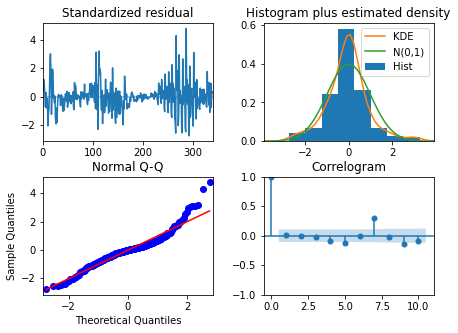

In [63]:
# Make plots to check the model ARIMA(0, 1, 4)

can_model.plot_diagnostics(figsize=(7,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

The standardized residual plot shows that the mean is near zero and the density is close to normal distribution; also almost all points are around the line in the Normal Q-Q plot; finally, the ACF plot shows the RE are not autocorrelated. Therefore, the model ARIMA(2, 2, 5) is a good fit now.

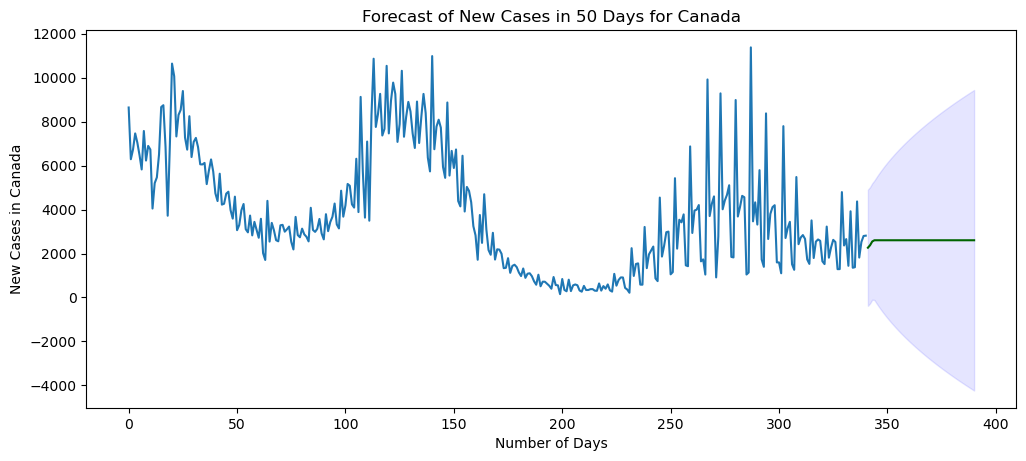

In [64]:
# Forecast
fc_can, ci_can = can_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc_can = np.arange(len(can_case), len(can_case)+n_periods)

# make series for plotting purpose
fc_series_can = pd.Series(fc_can, index=index_of_fc_can)
lower_series_can = pd.Series(ci_can[:, 0], index=index_of_fc_can)
upper_series_can = pd.Series(ci_can[:, 1], index=index_of_fc_can)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(can_case)
plt.plot(fc_series_can, color='darkgreen')
plt.ylabel('New Cases in Canada')
plt.xlabel('Number of Days')
plt.fill_between(lower_series_can.index,
lower_series_can,
upper_series_can,
color='b', alpha=.1)
plt.title("Forecast of New Cases in 50 Days for Canada")
plt.show()

The total trend of new cases of Canada is seasonal fluctuant and the prediction new cases in 50 days is about 1700.

In [65]:
#Now clean 'new_cases' in the second dataset for USA.

usa_cases=df2.loc[df2['location']=='United States']
usa_cases=usa_cases.sort_values('date')
usa_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
126892,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126893,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126894,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126895,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
126896,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,-9227.9,-3.71,-3.11,-27.718481


In [66]:
start_date='2020-12-13'
end_date='2021_11_19'
usa_con1=usa_cases['date']>=start_date
usa_con2=usa_cases['date']<end_date
usa_cases=usa_cases[usa_con1&usa_con2]

In [67]:
#Check missing values

usa_cases['new_cases'].isna().sum()

0

There is no missing values in 'new_cases' thus can_cases is ready is ready to be analysed.

In [68]:
usa_case=usa_cases['new_cases'].values
usa_case=pd.Series(usa_case)
usa_case.head()

0    186705.0
1    200631.0
2    222052.0
3    240691.0
4    237229.0
dtype: float64

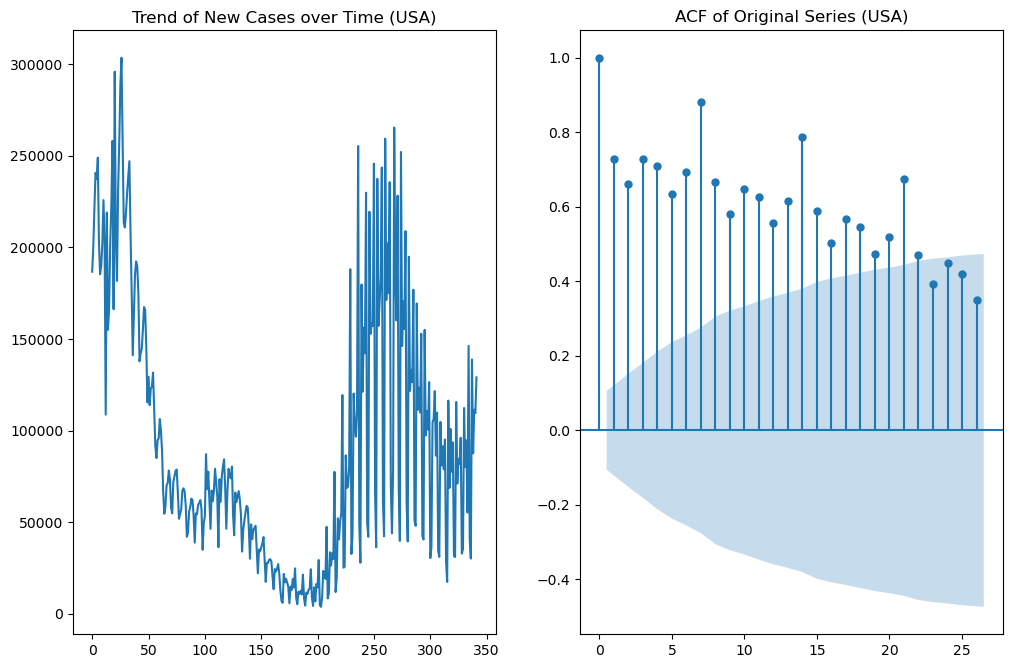

In [69]:
# Check if the original serires is stationary by plotting the trend and
# ACF of the original series

fig8, axes = plt.subplots(1,2,figsize=(12, 10), dpi= 100)

usa_case.plot(figsize=(12,8), ax=axes[0], title='Trend of New Cases over Time (USA)')
plot_acf(usa_case, ax=axes[1], title='ACF of Original Series (USA)');

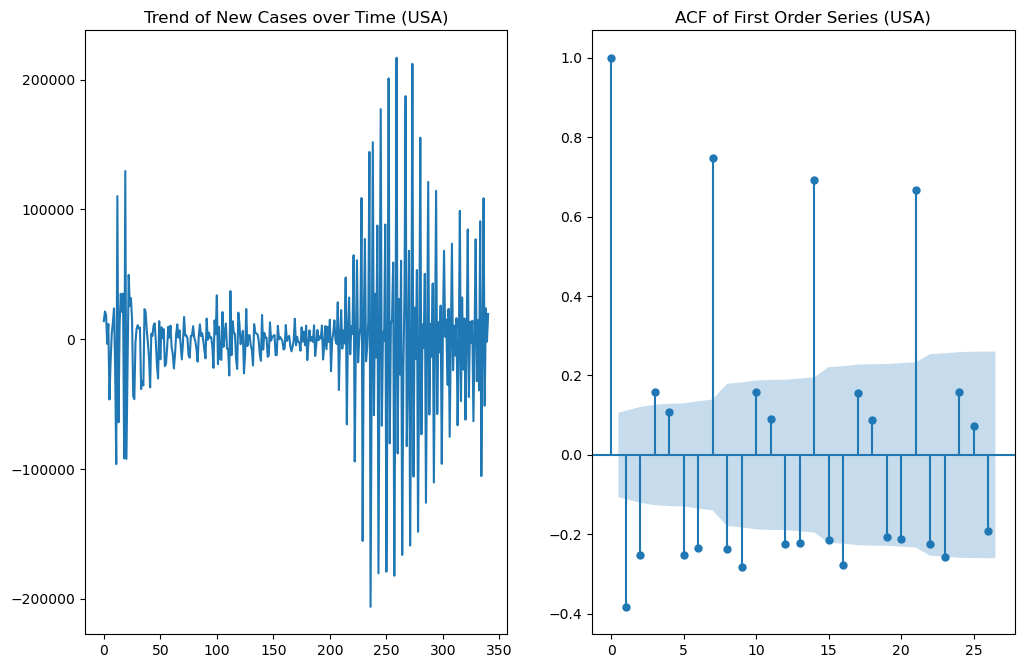

In [70]:
fig9, axes = plt.subplots(1,2,figsize=(12, 10), dpi= 100)

diff_usa=pd.Series(np.diff(usa_case))
diff_usa.plot(figsize=(12,8), ax=axes[0], title='Trend of New Cases over Time (USA)')
plot_acf(diff_usa, ax=axes[1], title='ACF of First Order Series (USA)');

It looks like the series is good to be analysed, now perform ADF test to check the value of 'd'.

In [71]:
#Perform ADF test to check the stationary

usa_result=adfuller(diff_usa)
print('The ADF Statistic of 2nd order difficing: %f' % usa_result[0])  
print('The p value of 2nd order difficing: %f' % usa_result[1])

The ADF Statistic of 2nd order difficing: -4.730865
The p value of 2nd order difficing: 0.000074


The p-value is almost 0 which is much less than 0.05, thus we can reject the null hypothesis which means that the series is stationary enough after second differencing.

In [72]:
#Build and find the best ARIMA model with minimum AIC to find the values of 'p'
# and 'q', also use ADF test to find the value of 'd'.

usa_model = pm.auto_arima(usa_case, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=5, max_q=5, # maximum p and q
m=1, # frequency of series
d=None, # use adftest to find optimal 'd'
seasonal=False, # No Seasonality
start_P=0,
D=None,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(usa_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8222.806, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8376.157, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8327.170, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8221.250, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8374.162, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8224.846, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8206.699, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8204.341, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8204.247, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8252.365, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8206.239, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8237.208, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8205.288, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8201.701, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]          

Since we got the same value of 'd' in both tests, we can select ARIMA(2, 1, 1) as our optimal model.

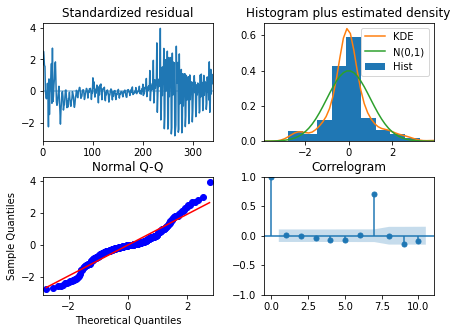

In [73]:
# Make plots to check the model ARIMA(2, 1, 1)

usa_model.plot_diagnostics(figsize=(7,5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

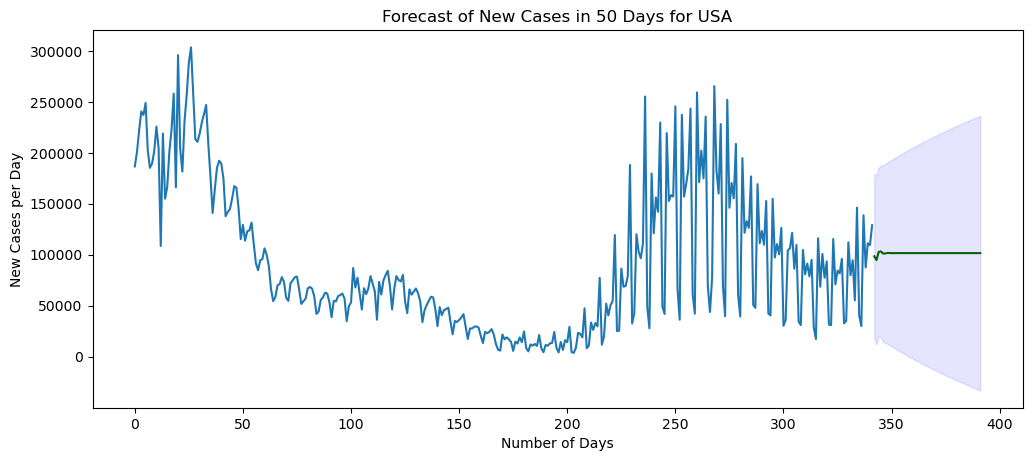

In [74]:
# Forecast
#n_periods=50
fc_usa, confint1 = usa_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc_usa = np.arange(len(usa_case), len(usa_case)+n_periods)

# make series for plotting purpose
fc_series_usa = pd.Series(fc_usa, index=index_of_fc_usa)
lower_series_usa = pd.Series(confint1[:, 0], index=index_of_fc_usa)
upper_series_usa = pd.Series(confint1[:, 1], index=index_of_fc_usa)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(usa_case)
plt.plot(fc_series_usa, color='darkgreen')
plt.ylabel('New Cases per Day')
plt.xlabel('Number of Days')
plt.fill_between(lower_series_usa.index,
lower_series_usa,
upper_series_usa,
color='b', alpha=.1)
plt.title("Forecast of New Cases in 50 Days for USA")
plt.show()

The new cases in USA reach the lowest at summer and highest at fall, the future new case prediction in 50 days is about 100,000 people.

## Question 5

Nowadays, COVID-19 is spreading so fast and it is become a part of our lives, we cannot ignore or get rid of it within a short time, the effect of COVID-19 is seriously and disastrous, therefore fully vaccinated of everyone and reach the herd immunity is the best solution to the outbreak. From the data analysis of the COVID-19 Vaccination rates, it is pleased to say that the vaccination rate is increasing everyday, from the part 3, performing the prediction in 50 days about vaccinated rate of Canada and USA and train the model to find the optimal model for Canada based on ARIMA method. From part 4, using the same method to forecasting the new cases in 50 days for Canada and USA. These two features could reflect these two countries attitude to the COVID-19. It can be seen from the prediction of base-case of vaccination rate and new cases in 50 days of Canada and USA, the vaccinated rate of Canada is 80% and the United States is 70%, The new cases of Canada in 50 days is 2200 people and USA is 95000 people, however it is noteworthy that, The populations of USA and Canada are different, USA has 8.6687 times population to Canada, therefore if comparing the new cases of these two countries, Canada's population need to be corrected to same as USA and therefore the new cases in 50 days of Canada will be 19071 people, which is still much lower than USA. According to these two predictions, there is no doubt to say that Canada has better effective vaccination program than the United States. However, there are still some unpredictable factors could affect the future new cases, for example, the new omicron COVID-19 variant spreading faster than previous variant, which may lead the new cases increase significantly. Cold weather can be another factor cause COVID-19 spreading, human bodies lack resistance to diseases. Due to the shorter hours of sunlight in winter, our vitamin D levels may be lower. Since vitamin D helps strengthen our immune system, the lack of this nutrient makes us more susceptible to diseases. Other policies can also lead the diseases spreading, Canada has tougher lock-down measures than USA, though the Canada's economy impacted by this policy, the new cases of Canada decreased indeed. Therefore, the dataset needs to be update frequently to modify and correct the prediction model.